In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import os
import geopandas as gpd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
from matplotlib import gridspec
from wordcloud import WordCloud
pd.set_option('display.max_columns', 500)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# ! curl -O https://data.cityofnewyork.us/resource/3ktt-gd74.csv
# ! mv 3ktt-gd74.csv LinkNYC_Location.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  326k    0  326k    0     0   337k      0 --:--:-- --:--:-- --:--:--  337k
'mv' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# ! curl -O https://www.dallasopendata.com/resource/56ru-r8vk.csv
# ! mv 56ru-r8vk.csv 311.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  391k    0  391k    0     0   404k      0 --:--:-- --:--:-- --:--:--  404k
'mv' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
# ! curl -O https://data.cityofnewyork.us/resource/24un-wiy8.csv
# ! mv 24un-wiy8.csv kiosk.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  272k    0  272k    0     0   840k      0 --:--:-- --:--:-- --:--:--  841k


In [4]:
#linkLocation = pd.read_csv("LinkNYC_Location.csv")
#serviceafter = pd.read_csv("311.csv")
kiosk = pd.read_csv("kiosk.csv")

In [5]:
kiosk.head()

,active_date,address,boro,census_tract,city,community_board,corner,council_district,cross_street_1,cross_street_2,install_date,latitude,longitude,nta,nta_name,phone_status,ppt_id,site_id,state,status,tablet_status,wifi_status,zip
0,2017-03-08T00:00:00.000,632 NOSTRAND AVENUE,Brooklyn,315.0,New York,8.0,SW,36.0,DEAN STREET,BERGEN STREET,2017-02-17T00:00:00.000,40.676752,-73.949935,BK61,Crown Heights North,up,127047,bk-08-127047,NY,Link Active!,up,up,11216
1,2018-01-05T00:00:00.000,41 SACKMAN STREET,Brooklyn,367.0,New York,16.0,SE,37.0,FULTON STREET,HERKIMER STREET,2017-09-17T00:00:00.000,40.677845,-73.905901,BK79,Ocean Hill,up,145930,bk-16-145930,NY,Link Active!,up,up,11233
2,2018-07-27T00:00:00.000,3723 CHURCH AVENUE,Brooklyn,816.0,New York,17.0,NW,41.0,EAST 37 STREET,EAST 38 STREET,2017-11-10T00:00:00.000,40.651230,-73.942062,BK91,East Flatbush-Farragut,up,146003,bk-17-146003,NY,Link Active!,up,up,11203
3,2017-06-13T00:00:00.000,111 EAST BURNSIDE AVENUE,Bronx,241.0,New York,5.0,NW,14.0,CRESTON AVENUE,MORRIS AVENUE,2017-04-15T00:00:00.000,40.853028,-73.905076,BX41,Mount Hope,up,111577,bx-05-111577,NY,Link Active!,up,up,10453
4,2016-07-01T00:00:00.000,2374 JEROME AVENUE,Bronx,239.0,New York,5.0,NE,14.0,EAST 184 STREET,EAST FORDHAM ROAD,2016-06-09T00:00:00.000,40.860630,-73.902369,BX40,Fordham South,up,119606,bx-05-119606,NY,Link Active!,up,up,10468


In [6]:
kiosk['active_date'] = pd.to_datetime(kiosk['active_date'])
serviceafter['created_date'] = pd.to_datetime(serviceafter['created_date'])

NameError: name 'serviceafter' is not defined

In [ ]:
kiosk = kiosk[pd.notnull(kiosk['active_date'])]

In [7]:
kiosk.head()

,active_date,address,boro,census_tract,city,community_board,corner,council_district,cross_street_1,cross_street_2,install_date,latitude,longitude,nta,nta_name,phone_status,ppt_id,site_id,state,status,tablet_status,wifi_status,zip
0,2017-03-08,632 NOSTRAND AVENUE,Brooklyn,315.0,New York,8.0,SW,36.0,DEAN STREET,BERGEN STREET,2017-02-17T00:00:00.000,40.676752,-73.949935,BK61,Crown Heights North,up,127047,bk-08-127047,NY,Link Active!,up,up,11216
1,2018-01-05,41 SACKMAN STREET,Brooklyn,367.0,New York,16.0,SE,37.0,FULTON STREET,HERKIMER STREET,2017-09-17T00:00:00.000,40.677845,-73.905901,BK79,Ocean Hill,up,145930,bk-16-145930,NY,Link Active!,up,up,11233
2,2018-07-27,3723 CHURCH AVENUE,Brooklyn,816.0,New York,17.0,NW,41.0,EAST 37 STREET,EAST 38 STREET,2017-11-10T00:00:00.000,40.651230,-73.942062,BK91,East Flatbush-Farragut,up,146003,bk-17-146003,NY,Link Active!,up,up,11203
3,2017-06-13,111 EAST BURNSIDE AVENUE,Bronx,241.0,New York,5.0,NW,14.0,CRESTON AVENUE,MORRIS AVENUE,2017-04-15T00:00:00.000,40.853028,-73.905076,BX41,Mount Hope,up,111577,bx-05-111577,NY,Link Active!,up,up,10453
4,2016-07-01,2374 JEROME AVENUE,Bronx,239.0,New York,5.0,NE,14.0,EAST 184 STREET,EAST FORDHAM ROAD,2016-06-09T00:00:00.000,40.860630,-73.902369,BX40,Fordham South,up,119606,bx-05-119606,NY,Link Active!,up,up,10468


In [8]:
set(kiosk["boro"])

{'Bronx', 'Brooklyn', 'Manhattan'}

In [9]:
brooklyn_kiosk = kiosk[kiosk["boro"]=="Brooklyn"]
bronx_kiosk = kiosk[kiosk["boro"]=="Bronx"]
manhattan_kiosk = kiosk[kiosk["boro"]=="Manhattan"]

In [10]:
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)

In [11]:
print(minmax(brooklyn_kiosk.active_date))
print(minmax(bronx_kiosk.active_date))
print(minmax(manhattan_kiosk.active_date))

(Timestamp('2016-12-05 00:00:00'), Timestamp('2018-07-27 00:00:00'))
(Timestamp('2016-05-25 00:00:00'), Timestamp('2018-08-02 00:00:00'))
(Timestamp('2016-01-19 00:00:00'), Timestamp('2018-08-01 00:00:00'))


In [83]:
url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=created_date%20BETWEEN%20%272016-10-01T00:00:00%27%20AND%20%272016-10-31T00:00:00%27"
brooklyn_before = pd.read_json(url)

In [84]:
url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=created_date%20BETWEEN%20%272018-09-01T00:00:00%27%20AND%20%272018-09-30T00:00:00%27"
brooklyn_after = pd.read_json(url)

In [85]:
brooklyn_before = brooklyn_before[brooklyn_before["borough"]=="BROOKLYN"]
brooklyn_after = brooklyn_after[brooklyn_after["borough"]=="BROOKLYN"]

complaint_before = brooklyn_before['complaint_type'].values
complaint_after = brooklyn_after['complaint_type'].values

In [86]:
complaint_before = str(list(complaint_before))
complaint_after = str(list(complaint_after))

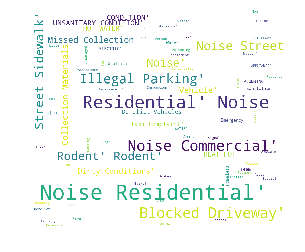

In [87]:
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(complaint_before)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('brooklyn_before.png')

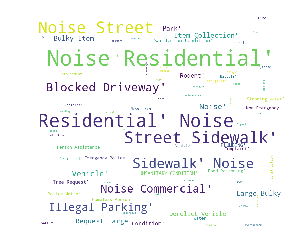

In [88]:
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(complaint_after)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('brooklyn_after.png')

In [89]:
url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=created_date%20BETWEEN%20%272016-03-01T00:00:00%27%20AND%20%272016-03-31T00:00:00%27"
bronx_before = pd.read_json(url)

In [90]:
url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=created_date%20BETWEEN%20%272018-10-01T00:00:00%27%20AND%20%272018-10-31T00:00:00%27"
bronx_after = pd.read_json(url)

In [91]:
bronx_before = bronx_before[bronx_before["borough"]=="BRONX"]
bronx_after = bronx_after[bronx_after["borough"]=="BRONX"]

complaint_before = bronx_before['complaint_type'].values
complaint_after = bronx_after['complaint_type'].values

complaint_before = str(list(complaint_before))
complaint_after = str(list(complaint_after))

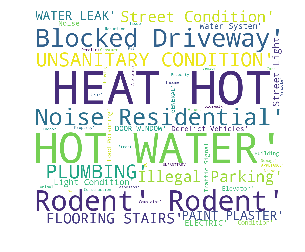

In [92]:
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(complaint_before)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('bronx_before.png')

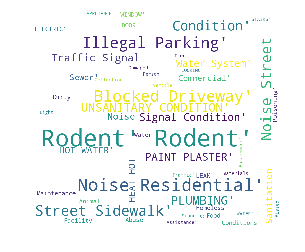

In [93]:
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(complaint_after)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('bronx_after.png')

In [94]:
url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=created_date%20BETWEEN%20%272015-11-01T00:00:00%27%20AND%20%272015-11-30T00:00:00%27"
manhattan_before = pd.read_json(url)

url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=created_date%20BETWEEN%20%272018-10-01T00:00:00%27%20AND%20%272018-10-31T00:00:00%27"
manhattan_after = pd.read_json(url)

In [95]:
manhattan_before = manhattan_before[manhattan_before["borough"]=="MANHATTAN"]
manhattan_after = manhattan_after[manhattan_after["borough"]=="MANHATTAN"]


complaint_before = manhattan_before['complaint_type'].values
complaint_after = manhattan_after['complaint_type'].values

complaint_before = str(list(complaint_before))
complaint_after = str(list(complaint_after))

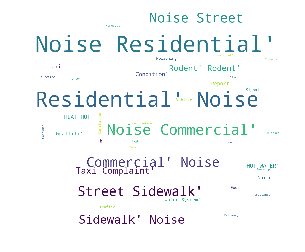

In [96]:
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(complaint_before)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('manhattan_before.png')

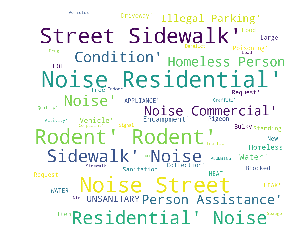

In [97]:
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(complaint_after)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('manhattan_after.png')

In [142]:
service['created_date'] = pd.to_datetime(service['created_date'])

In [154]:
brooklyn_before = service[service["borough"]=="BROOKLYN"]
bronx_before = service[service["borough"]=="BRONX"]
manhattan_before = service[service["borough"]=="MANHATTAN"]

In [145]:
#type(brooklyn['created_date'][0])

In [156]:
# brooklyn: before 2016-10, after 2018-10
brooklyn_before_index = (brooklyn_before['created_date'] >= '2016-01-01') & (brooklyn_before['created_date'] <= '2016-12-31')
brooklyn_before = brooklyn_before.loc[brooklyn_before_index]

# brooklyn_after_index = (brooklyn['created_date'] >= '2018-09-01 00:00:00') & (brooklyn['created_date'] <= '2019-09-30 00:00:00')
# brooklyn_after = brooklyn.loc[brooklyn_after_index]

In [147]:
# bronx: before 2016-03, after 2018-10
bronx_before_index = (bronx_before['created_date'] >= '2016-03-01 00:00:00') & (bronx_before['created_date'] <= '2016-03-31 00:00:00')
bronx_before = bronx_before.loc[bronx_before_index]

# bronx_after_index = (bronx['created_date'] >= '2018-10-01 00:00:00') & (bronx['created_date'] <= '201810-31 00:00:00')
# bronx_after = bronx.loc[bronx_after_index]

In [148]:
# manhattan: before 2015-11, after 2018-10
manhattan_before_index = (manhattan_before['created_date'] >= '2015-11-01 00:00:00') & (manhattan_before['created_date'] <= '2015-11-30 00:00:00')
manhattan_before = manhattan_before.loc[manhattan_before_index]

# manhattan_after_index = (manhattan['created_date'] >= '2018-10-01 00:00:00') & (manhattan['created_date'] <= '2019-10-31 00:00:00')
# manhattan_after = manhattan.loc[manhattan_after_index]

In [42]:
set(Location311["complaint_type"])

{'APPLIANCE',
 'Air Quality',
 'Animal Abuse',
 'Blocked Driveway',
 'Broken Muni Meter',
 'Building/Use',
 'Bus Stop Shelter Placement',
 'Construction',
 'Consumer Complaint',
 'Curb Condition',
 'DOOR/WINDOW',
 'Damaged Tree',
 'Dead Tree',
 'Derelict Bicycle',
 'Derelict Vehicle',
 'Derelict Vehicles',
 'Dirty Conditions',
 'ELECTRIC',
 'Electrical',
 'Elevator',
 'FLOORING/STAIRS',
 'Food Establishment',
 'For Hire Vehicle Complaint',
 'GENERAL',
 'General Construction/Plumbing',
 'Graffiti',
 'HEAT/HOT WATER',
 'Hazardous Materials',
 'Highway Condition',
 'Homeless Encampment',
 'Illegal Parking',
 'Illegal Tree Damage',
 'Indoor Air Quality',
 'Indoor Sewage',
 'Industrial Waste',
 'Lead',
 'Litter Basket / Request',
 'Maintenance or Facility',
 'Missed Collection (All Materials)',
 'Mold',
 'New Tree Request',
 'Noise',
 'Noise - Commercial',
 'Noise - Helicopter',
 'Noise - Park',
 'Noise - Residential',
 'Noise - Street/Sidewalk',
 'Noise - Vehicle',
 'Non-Emergency Police M